In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=328874cec00731092a29bbd32d483a6eaa25b571dc8602d299c948b0dc8e410a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
#Initiate range for each input and output

vehicle_per_minute= np.arange(0,40,1)
green_time_second = np.arange(0,120,1)
vehicle_average_waiting_time_second = np.arange(0,20,1)


In [ ]:
#Create fuzzy membership for each input/output with its respective linguistic terms

low_average_vpm = fuzz.trapmf(vehicle_per_minute, [0,0,5,10])
medium_average_vpm = fuzz.trapmf(vehicle_per_minute, [5,10,15,20])
high_average_vpm = fuzz.trapmf(vehicle_per_minute, [15,20,40,40])

low_average_vwt = fuzz.trapmf(vehicle_average_waiting_time_second, [0,0,8,10])
medium_average_vwt = fuzz.trapmf(vehicle_average_waiting_time_second, [8,10,12,14])
high_average_vwt = fuzz.trapmf(vehicle_average_waiting_time_second,[12,14,20,20])

short_green_time = fuzz.trapmf(green_time_second, [15,15,30,45])
medium_green_time = fuzz.trapmf(green_time_second, [30,45,60,75])
long_green_time = fuzz.trapmf(green_time_second, [60,75,120,120])

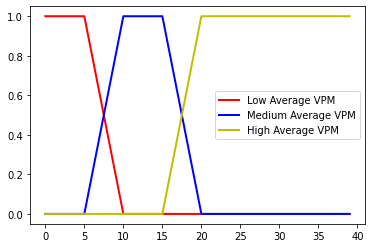

In [ ]:
#Plotting Average vehicles per minute membership functions

plt.plot(vehicle_per_minute,low_average_vpm,'r',linewidth=2,label="Low Average VPM")
plt.plot(vehicle_per_minute,medium_average_vpm,'b',linewidth=2,label="Medium Average VPM")
plt.plot(vehicle_per_minute,high_average_vpm,'y',linewidth=2,label="High Average VPM")
plt.legend()



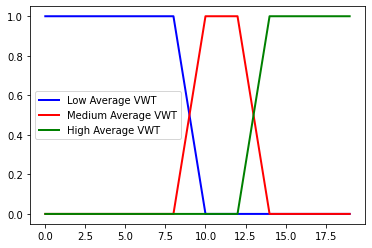

In [ ]:
#Plotting average vehicles waiting time membership functions

plt.plot(vehicle_average_waiting_time_second,low_average_vwt,'b',linewidth=2,label="Low Average VWT")
plt.plot(vehicle_average_waiting_time_second,medium_average_vwt,'r',linewidth=2,label="Medium Average VWT")
plt.plot(vehicle_average_waiting_time_second,high_average_vwt,'g',linewidth=2,label="High Average VWT")
plt.legend()

(15.0, 124.95)

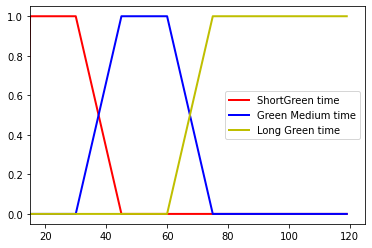

In [ ]:
#Plotting green traffic time membership functions

plt.plot(short_green_time,'r',linewidth=2,label="ShortGreen time")
plt.plot(medium_green_time,'b',linewidth=2,label="Green Medium time")
plt.plot(long_green_time,'y',linewidth=2,label="Long Green time")
plt.legend()
plt.xlim(xmin=15)

In [ ]:
def mamdani_traffic_light(vpm,vwt):

  #Intepreting the membership function

  is_more_car = fuzz.interp_membership(vehicle_per_minute,high_average_vpm,vpm)
  is_wait_long = fuzz.interp_membership(vehicle_average_waiting_time_second,high_average_vwt,vwt)

  is_less_car = fuzz.interp_membership(vehicle_per_minute,low_average_vpm,vpm)
  is_wait_short = fuzz.interp_membership(vehicle_average_waiting_time_second,low_average_vwt,vwt)

  is_average_car = fuzz.interp_membership(vehicle_per_minute,medium_average_vpm,vpm)
  is_average_wait = fuzz.interp_membership(vehicle_average_waiting_time_second,medium_average_vwt,vwt)

  # Rule 1: If vpm high and vwt high, then traffic is heavy
  fire_rule_1 = min(is_wait_long,is_more_car)
  r1_out = np.fmin(fire_rule_1,long_green_time)

  # Rule 2: If vpm high and vwt medium, then traffic is heavy
  fire_rule_2 = min(is_average_wait,is_more_car)
  r2_out = np.fmin(fire_rule_2,long_green_time)

  # Rule 3: If vpm high and vwt low, then traffic is medium
  fire_rule_3 = min(is_wait_long,is_less_car)
  r3_out = np.fmin(fire_rule_3,medium_green_time)

  # Rule 4: If vpm low and vwt low, then traffic is short
  fire_rule_4 = min(is_less_car,is_wait_short)
  r4_out = np.fmin(fire_rule_4,short_green_time)

  # Rule 5: If vpm low and vwt medium, then traffic is short
  fire_rule_5 = min(is_less_car,is_average_wait)
  r5_out = np.fmin(fire_rule_5,short_green_time)

  # Rule 6: If vpm low and vwt high, then traffic is long
  fire_rule_6 = min(is_less_car,is_wait_long)
  r6_out = np.fmin(fire_rule_6,long_green_time)

  # Rule 7: If vpm medium and vwt medium, then traffic is medium

  fire_rule_7 = min(is_average_car,is_average_wait)
  r7_out = np.fmin(fire_rule_7,medium_green_time)

  # Rule 8: If vpm medium and vwt low, then traffic is short

  fire_rule_8 = min(is_average_car,is_wait_short)
  r8_out = np.fmin(fire_rule_8,short_green_time)

  # Rule 9: If vpm medium and vwt high, then traffic is high

  fire_rule_9 = min(is_average_car,is_wait_long)
  r9_out = np.fmin(fire_rule_9,long_green_time)


  fuz_out = np.fmax(r1_out,r2_out)
  fuz_out = np.fmax(fuz_out,r3_out)
  fuz_out = np.fmax(fuz_out,r4_out)
  fuz_out = np.fmax(fuz_out,r5_out)
  fuz_out = np.fmax(fuz_out,r6_out)
  fuz_out = np.fmax(fuz_out,r7_out)
  fuz_out = np.fmax(fuz_out,r8_out)
  fuz_out = np.fmax(fuz_out,r9_out)


  #defuzzification using mean of maxima

  time_green_light=fuzz.defuzz(green_time_second,fuz_out,"mom")
  return time_green_light







In [ ]:
#input is light traffic
output = mamdani_traffic_light(5,10)
print("When average vehicle per minute is 15 and average waiting time is 12, The traffic light time is  ",output)

When average vehicle per minute is 15 and average waiting time is 12, The traffic light time is   22.5


In [ ]:
#input is heavy traffic
output = mamdani_traffic_light(20,12)
print("When average vehicle per minute is 60 and average waiting time is 15, The traffic light time is ",output)

When average vehicle per minute is 60 and average waiting time is 15, The traffic light time is  97.0
